In [1]:
import pandas as pd 
import random 
import numpy as np
import sqlite3

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
con = sqlite3.connect(r'C:\Users\saadais\OneDrive - Hewlett Packard Enterprise\Desktop\Auto_f\Python\UDEMY\Resources_resto\zomato_rawdata.sqlite')

In [3]:
df = pd.read_sql_query('SELECT * FROM Users', con)

In [4]:
df.shape

(51717, 18)

In [5]:
df.isna().sum()/len(df)*100

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [6]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [7]:
df['rate'].replace(('NEW','-'), np.nan, inplace=True)

In [8]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [9]:
df['rate']=df['rate'].apply(lambda x : float(x.split('/')[0]) if type(x)==str else x )

In [10]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [11]:
df.describe()

,index,rate,votes
count,51717.000000,41665.000000,51717.000000
mean,25858.000000,3.700449,283.697527
std,14929.556273,0.440513,803.838853
min,0.000000,1.800000,0.000000
25%,12929.000000,3.400000,7.000000
50%,25858.000000,3.700000,41.000000
75%,38787.000000,4.000000,198.000000
max,51716.000000,4.900000,16832.000000


<Axes: ylabel='rate'>

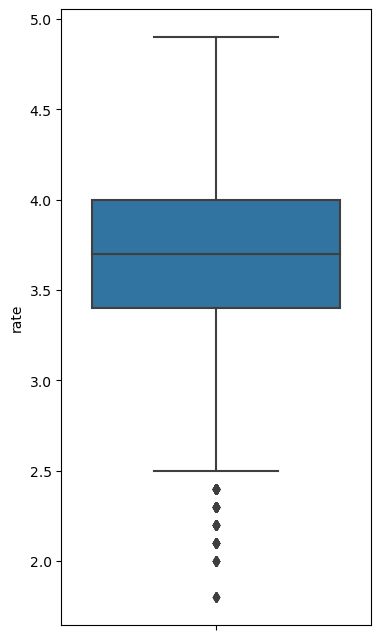

In [12]:
#plotting the figure
plt.figure(figsize = (4,8))
sns.boxplot(y = df.rate)

In [13]:
x =pd.crosstab(df['rate'],df['online_order'])
x

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


<Axes: xlabel='rate'>

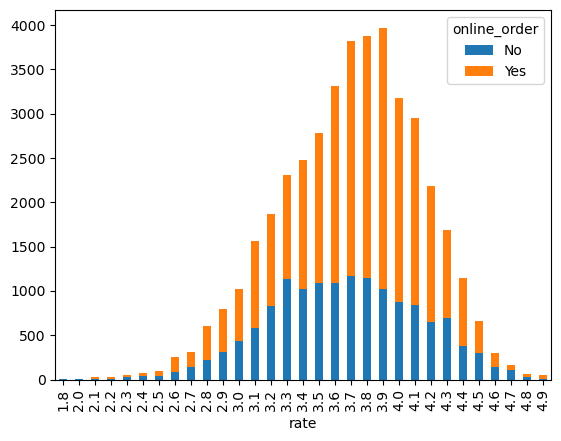

In [14]:
x.plot(kind='bar', stacked=True)

In [15]:
normalise = x.div(x.sum(axis=1).astype(float),axis=0)

In [16]:
normalise

online_order,No,Yes
rate,,
1.8,1.000000,0.000000
2.0,1.000000,0.000000
2.1,0.375000,0.625000
2.2,0.384615,0.615385
2.3,0.568627,0.431373
2.4,0.514286,0.485714
2.5,0.376238,0.623762
2.6,0.319231,0.680769
2.7,0.459283,0.540717


<Axes: xlabel='rate'>

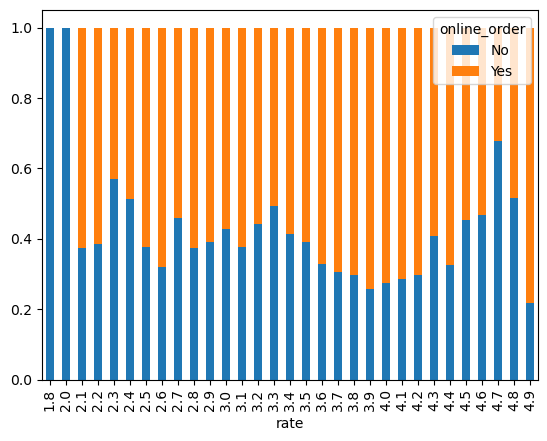

In [17]:
normalise.plot(kind='bar', stacked=True)

In [18]:
new_data = df.dropna(subset='rest_type')

In [19]:
new_data["rest_type"].isnull().sum()

0

In [20]:
new_data["name"]

0                                                    Jalsa
1                                           Spice Elephant
2                                          San Churro Cafe
3                                    Addhuri Udupi Bhojana
4                                            Grand Village
                               ...                        
51712    Best Brews - Four Points by Sheraton Bengaluru...
51713                             Vinod Bar And Restaurant
51714    Plunge - Sheraton Grand Bengaluru Whitefield H...
51715    Chime - Sheraton Grand Bengaluru Whitefield Ho...
51716                         The Nest - The Den Bengaluru
Name: name, Length: 51490, dtype: object

In [21]:
df_quick_bites = new_data[new_data['rest_type'].str.contains('Quick Bites')]

In [22]:
df_quick_bites

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
23,23,https://www.zomato.com/bangalore/my-tea-house-...,"224/Y, 4th Phase, 7th Block, 100 Feet Ring Roa...",My Tea House,Yes,No,3.6,62,080 65975430\r\n+91 7337733798,Banashankari,"Quick Bites, Cafe","Pasta, Iced Tea","Italian, Fast Food, Cafe, European",600,"[('Rated 4.0', ""RATED\n So, went here with fr...",[],Cafes,Banashankari
26,26,https://www.zomato.com/bangalore/coffee-tindi-...,"27th Cross Rd, Banashankari Stage II, Banashan...",Coffee Tindi,Yes,No,3.8,75,+91 9945758046,Banashankari,"Cafe, Quick Bites",None,"Cafe, South Indian",200,"[('Rated 5.0', 'RATED\n please provide some e...",[],Cafes,Banashankari
31,31,https://www.zomato.com/bangalore/foodiction-1-...,"2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...",Foodiction,Yes,No,2.8,506,+91 9916107070,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari
34,34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51641,51641,https://www.zomato.com/bangalore/andhra-spices...,"188, ITPL Main Road, Brookefields, Bangalore, ...",Andhra Spices,No,No,3.2,4,None,Brookefield,Quick Bites,None,"Andhra, Chinese, South Indian",None,"[('Rated 2.0', ""RATED\n Food is not upto the ...",[],Dine-out,Whitefield
51642,51642,https://www.zomato.com/bangalore/basaveshwara-...,"Nanjudeshwari complex, Oppsite Brookefield Mal...",Basaveshwara Khanavali,No,No,NaN,0,+91 9740912864\n+91 7353747430,Brookefield,Quick Bites,None,South Indian,200,[],[],Dine-out,Whitefield
51643,51643,https://www.zomato.com/bangalore/new-ambur-bir...,"AECS Layout, ITPL Main Road, Brookefield, Bang...",New Ambur Biryani,No,No,NaN,0,+91 9443087893,Brookefield,Quick Bites,None,"Biryani, Kebab",300,[],[],Dine-out,Whitefield
51644,51644,https://www.zomato.com/bangalore/punjabi-thadk...,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,No,No,NaN,0,+91 7338330336\n+91 9591568221,Brookefield,Quick Bites,None,North Indian,400,[],[],Dine-out,Whitefield


In [23]:
df_quick_bites['reviews_list']=df_quick_bites['reviews_list'].apply(lambda x : x.lower()) 

C:\Users\saadais\AppData\Local\Temp\ipykernel_14004\1417255561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quick_bites['reviews_list']=df_quick_bites['reviews_list'].apply(lambda x : x.lower())


In [24]:
df_quick_bites['reviews_list']

3        [('rated 4.0', "rated\n  great food and proper...
23       [('rated 4.0', "rated\n  so, went here with fr...
26       [('rated 5.0', 'rated\n  please provide some e...
31       [('rated 1.0', "rated\n  worst restaurant ever...
34       [('rated 3.0', 'rated\n  not worth for the mon...
                               ...                        
51641    [('rated 2.0', "rated\n  food is not upto the ...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [('rated 5.0', "rated\n  i was randomly lookin...
Name: reviews_list, Length: 20639, dtype: object

In [25]:
from nltk.corpus import stopwords, RegexpTokenizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saadais\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saadais\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
tokenizer=RegexpTokenizer("[A-Za-z]+")

In [27]:
df_quick_bites['reviews_list']= df_quick_bites['reviews_list'].apply(lambda x : tokenizer.tokenize(x))

C:\Users\saadais\AppData\Local\Temp\ipykernel_14004\2979555209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quick_bites['reviews_list']= df_quick_bites['reviews_list'].apply(lambda x : tokenizer.tokenize(x))


In [28]:
review_token = df_quick_bites['reviews_list']
print(review_token)

3        [rated, rated, n, great, food, and, proper, ka...
23       [rated, rated, n, so, went, here, with, friend...
26       [rated, rated, n, please, provide, some, extra...
31       [rated, rated, n, worst, restaurant, ever, veg...
34       [rated, rated, n, not, worth, for, the, money,...
                               ...                        
51641    [rated, rated, n, food, is, not, upto, the, ma...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [rated, rated, n, i, was, randomly, looking, o...
Name: reviews_list, Length: 20639, dtype: object


In [29]:
stopWord = stopwords.words('english')

In [30]:
stopWord.extend(['rated','n','x'])

In [31]:
rev = df_quick_bites['reviews_list'][3]
print(rev)

['rated', 'rated', 'n', 'great', 'food', 'and', 'proper', 'karnataka', 'style', 'full', 'meals', 'been', 'there', 'twice', 'and', 'was', 'fully', 'satisfied', 'will', 'give', 'stars', 'if', 'it', 's', 'well', 'managed', 'rated', 'rated', 'n', 'reached', 'the', 'place', 'at', 'pm', 'on', 'saturday', 'half', 'of', 'the', 'items', 'on', 'the', 'menu', 'were', 'over', 'what', 'was', 'annoying', 'was', 'is', 'the', 'food', 'was', 'cold', 'the', 'taste', 'was', 'also', 'very', 'average', 'only', 'dosa', 'and', 'holige', 'were', 'good', 'there', 'were', 'very', 'few', 'people', 'in', 'the', 'restaurant', 'and', 'the', 'service', 'was', 'still', 'very', 'slow', 'the', 'waiters', 'were', 'all', 'standing', 'in', 'one', 'corner', 'and', 'talking', 'had', 'to', 'call', 'them', 'repeatedly', 'rated', 'rated', 'n', 'had', 'been', 'here', 'good', 'food', 'served', 'and', 'tasty', 'good', 'place', 'to', 'go', 'with', 'freinds', 'and', 'family', 'should', 'be', 'first', 'to', 'get', 'served', 'well', 

In [32]:
revew_token_clean= review_token.apply(lambda x : [token for token in x if token not in stopWord] )

In [33]:
print(revew_token_clean)

3        [great, food, proper, karnataka, style, full, ...
23       [went, friends, tea, ambience, striking, say, ...
26       [please, provide, extra, sambal, quantity, les...
31       [worst, restaurant, ever, veg, manchurian, wor...
34       [worth, money, pay, ambience, good, enough, se...
                               ...                        
51641    [food, upto, mark, nquantity, food, little, nc...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [randomly, looking, zomato, burger, show, rest...
Name: reviews_list, Length: 20639, dtype: object


## unigram analysis 

In [34]:
from nltk import FreqDist

fd = FreqDist()

In [35]:
list_word =[]

for review in revew_token_clean:
    for word in review :
        list_word.append(word)
    


In [36]:
list_word

['great',
 'food',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'twice',
 'fully',
 'satisfied',
 'give',
 'stars',
 'well',
 'managed',
 'reached',
 'place',
 'pm',
 'saturday',
 'half',
 'items',
 'menu',
 'annoying',
 'food',
 'cold',
 'taste',
 'also',
 'average',
 'dosa',
 'holige',
 'good',
 'people',
 'restaurant',
 'service',
 'still',
 'slow',
 'waiters',
 'standing',
 'one',
 'corner',
 'talking',
 'call',
 'repeatedly',
 'good',
 'food',
 'served',
 'tasty',
 'good',
 'place',
 'go',
 'freinds',
 'family',
 'first',
 'get',
 'served',
 'well',
 'food',
 'one',
 'good',
 'hotel',
 'price',
 'udupi',
 'restaurant',
 'dirty',
 'floor',
 'walls',
 'waiters',
 'stained',
 'food',
 'cant',
 'clean',
 'floor',
 'even',
 'decorative',
 'colour',
 'paper',
 'every',
 'lot',
 'food',
 'coming',
 'taste',
 'food',
 'pretty',
 'decent',
 'chargw',
 'upset',
 'us',
 'menu',
 'says',
 'serve',
 'thambuli',
 'two',
 'variety',
 'rice',
 'etc',
 'still',
 'charged',
 'us',
 'full'

In [37]:
for i in list_word:
    fd[i]= fd[i]+1
    

In [38]:
fd.most_common()

[('food', 170672),
 ('good', 169085),
 ('place', 142338),
 ('chicken', 76826),
 ('taste', 70602),
 ('ordered', 55485),
 ('try', 43663),
 ('one', 43359),
 ('also', 42296),
 ('like', 41979),
 ('service', 39651),
 ('time', 38409),
 ('order', 37012),
 ('really', 36239),
 ('biryani', 35488),
 ('best', 33589),
 ('restaurant', 32669),
 ('great', 32601),
 ('quality', 30940),
 ('nice', 30744),
 ('tasty', 26564),
 ('rice', 26211),
 ('quantity', 25268),
 ('delivery', 24934),
 ('well', 24087),
 ('must', 23620),
 ('would', 22850),
 ('visit', 22711),
 ('price', 22695),
 ('get', 21954),
 ('veg', 21285),
 ('small', 21166),
 ('go', 20877),
 ('bad', 20851),
 ('tried', 20787),
 ('nthe', 19725),
 ('money', 19295),
 ('indian', 19178),
 ('friendly', 18389),
 ('awesome', 18272),
 ('paneer', 18215),
 ('masala', 18052),
 ('ambience', 17872),
 ('even', 17757),
 ('home', 17632),
 ('pizza', 17628),
 ('amazing', 17235),
 ('menu', 16861),
 ('experience', 16805),
 ('eat', 16392),
 ('much', 16365),
 ('love', 16198),


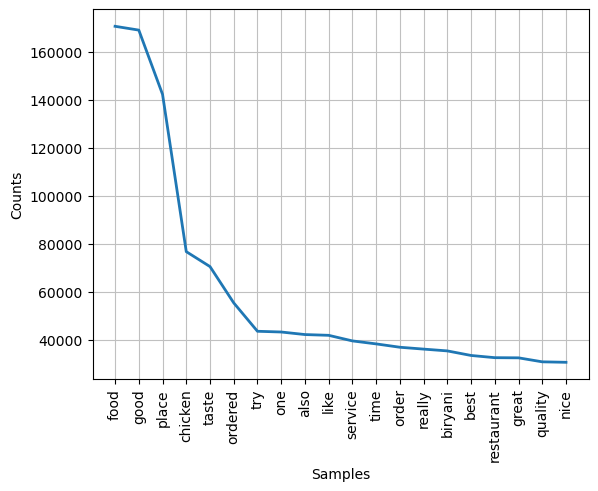

<Axes: xlabel='Samples', ylabel='Counts'>

In [39]:
fd.plot(20)

# bigram

In [40]:
from nltk import bigrams, trigrams

In [41]:
bi_grams= bigrams(list_word)

In [42]:
bi_grams

<generator object bigrams at 0x0000021CCCEB1700>

In [43]:
fd_bigrams = FreqDist()

for bigram in bi_grams:
    fd_bigrams[bigram] =  fd_bigrams[bigram]+1


In [44]:
fd_bigrams.most_common()

[(('must', 'try'), 13250),
 (('good', 'food'), 11531),
 (('food', 'good'), 11134),
 (('really', 'good'), 9919),
 (('north', 'indian'), 9059),
 (('pocket', 'friendly'), 8170),
 (('taste', 'good'), 8100),
 (('good', 'place'), 8055),
 (('value', 'money'), 7139),
 (('south', 'indian'), 7032),
 (('good', 'taste'), 6593),
 (('visit', 'place'), 6296),
 (('also', 'good'), 6170),
 (('one', 'best'), 6107),
 (('fried', 'rice'), 5960),
 (('quality', 'food'), 5822),
 (('chicken', 'biryani'), 5536),
 (('xa', 'xa'), 5351),
 (('non', 'veg'), 5296),
 (('ordered', 'chicken'), 5256),
 (('indian', 'food'), 4992),
 (('masala', 'dosa'), 4828),
 (('good', 'good'), 4755),
 (('f', 'f'), 4744),
 (('home', 'delivery'), 4721),
 (('food', 'quality'), 4407),
 (('small', 'place'), 4375),
 (('must', 'visit'), 4347),
 (('nice', 'place'), 4287),
 (('tasty', 'food'), 4051),
 (('best', 'place'), 3910),
 (('great', 'place'), 3704),
 (('good', 'service'), 3665),
 (('first', 'time'), 3558),
 (('take', 'away'), 3530),
 (('go

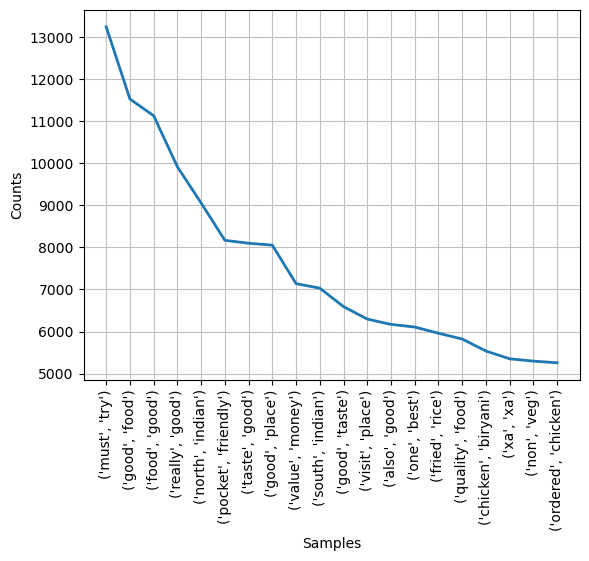

<Axes: xlabel='Samples', ylabel='Counts'>

In [45]:
fd_bigrams.plot(20)

# trigram

In [46]:
tri_grams = trigrams(list_word)

In [47]:
fd_trigram= FreqDist()

for trigram in tri_grams:
    fd_trigram[trigram]= fd_trigram[trigram] + 1


In [48]:
fd_trigram.most_common(40)

[(('xa', 'xa', 'xa'), 5059),
 (('north', 'indian', 'food'), 3079),
 (('f', 'f', 'f'), 2581),
 (('paneer', 'butter', 'masala'), 1638),
 (('must', 'visit', 'place'), 1594),
 (('south', 'indian', 'food'), 1486),
 (('good', 'food', 'good'), 1367),
 (('ordered', 'chicken', 'biryani'), 1275),
 (('pocket', 'friendly', 'place'), 1059),
 (('chicken', 'fried', 'rice'), 1050),
 (('f', 'c', 'f'), 1042),
 (('food', 'really', 'good'), 1021),
 (('veg', 'non', 'veg'), 1013),
 (('worst', 'food', 'ever'), 939),
 (('like', 'home', 'made'), 897),
 (('must', 'try', 'place'), 896),
 (('good', 'taste', 'good'), 827),
 (('good', 'value', 'money'), 825),
 (('south', 'indian', 'breakfast'), 816),
 (('home', 'made', 'food'), 787),
 (('food', 'reasonable', 'price'), 746),
 (('good', 'quality', 'food'), 732),
 (('ghar', 'ka', 'khana'), 693),
 (('keep', 'good', 'work'), 692),
 (('taste', 'really', 'good'), 686),
 (('home', 'cooked', 'food'), 653),
 (('quality', 'food', 'good'), 649),
 (('food', 'quality', 'good'), 

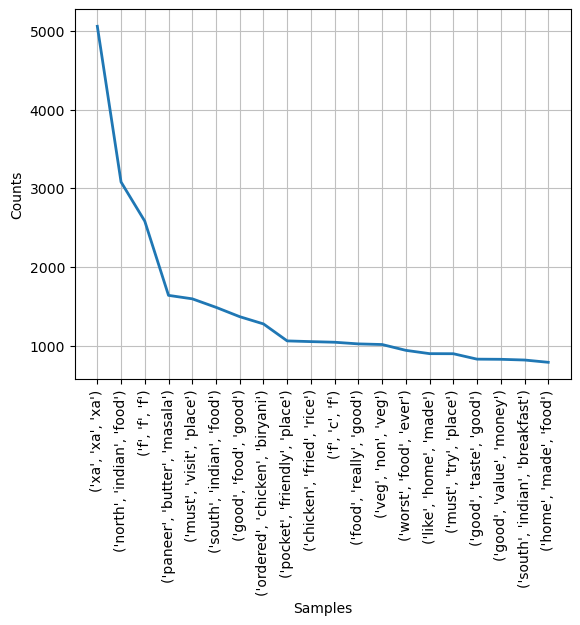

<Axes: xlabel='Samples', ylabel='Counts'>

In [49]:
fd_trigram.plot(20)

# extract geographical-coordinates from data

In [50]:
!pip install geocoder 
!pip install geopy

In [51]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', None, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan

In [52]:
len(df['location'].unique())

94

In [53]:
df['location']= df['location']+ ", Bangalore , karnataka , India"

In [54]:
df['location']

0              Banashankari, Bangalore , karnataka , India
1              Banashankari, Bangalore , karnataka , India
2              Banashankari, Bangalore , karnataka , India
3              Banashankari, Bangalore , karnataka , India
4              Basavanagudi, Bangalore , karnataka , India
                               ...                        
51712            Whitefield, Bangalore , karnataka , India
51713            Whitefield, Bangalore , karnataka , India
51714            Whitefield, Bangalore , karnataka , India
51715    ITPL Main Road, Whitefield, Bangalore , karnat...
51716    ITPL Main Road, Whitefield, Bangalore , karnat...
Name: location, Length: 51717, dtype: object

In [55]:
df_copy= df.copy()

In [56]:
df_copy['location'].isnull().sum()

21

In [57]:
df_copy=df_copy.dropna(subset='location')

In [58]:
df_copy['location'].isnull().sum()

0

In [59]:
locations = pd.DataFrame(df['location'].unique())
locations.columns=['name']
locations

,name
0,"Banashankari, Bangalore , karnataka , India"
1,"Basavanagudi, Bangalore , karnataka , India"
2,"Mysore Road, Bangalore , karnataka , India"
3,"Jayanagar, Bangalore , karnataka , India"
4,"Kumaraswamy Layout, Bangalore , karnataka , India"
...,...
89,"West Bangalore, Bangalore , karnataka , India"
90,"Magadi Road, Bangalore , karnataka , India"
91,"Yelahanka, Bangalore , karnataka , India"
92,"Sahakara Nagar, Bangalore , karnataka , India"


In [60]:
from geopy.geocoders import Nominatim

In [61]:
geolocator = Nominatim (user_agent="app" ,timeout=None)

lat=[]
lon =[]
for location in locations['name']:
    location = geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)
    



In [62]:
locations['longitude']= lon 
locations['latitude']=lat



In [63]:
locations

,name,longitude,latitude
0,"Banashankari, Bangalore , karnataka , India",77.515485,12.884924
1,"Basavanagudi, Bangalore , karnataka , India",77.575502,12.941726
2,"Mysore Road, Bangalore , karnataka , India",77.530070,12.946703
3,"Jayanagar, Bangalore , karnataka , India",77.582423,12.929273
4,"Kumaraswamy Layout, Bangalore , karnataka , India",77.559502,12.906768
...,...,...,...
89,"West Bangalore, Bangalore , karnataka , India",77.553089,13.009476
90,"Magadi Road, Bangalore , karnataka , India",77.555355,12.975653
91,"Yelahanka, Bangalore , karnataka , India",77.596345,13.100698
92,"Sahakara Nagar, Bangalore , karnataka , India",77.580061,13.062147


 # build geographical heatmap

In [68]:
locations[locations['longitude'].isna()]

,name,longitude,latitude
80,"Rammurthy Nagar, Bangalore , karnataka , India",NaN,NaN
86,"Sadashiv Nagar, Bangalore , karnataka , India",NaN,NaN


In [97]:
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [98]:
locations['latitude'][80]=12.972442
locations['longitude'][80]=77.580643

In [99]:
locations['latitude'][86]=13.010316
locations['longitude'][86]=77.580569

# geographical heat-map

In [104]:
df['cuisines'].isna().sum()

45

In [105]:
df= df.dropna(subset='cuisines')

In [108]:
df['cuisines'].value_counts()

cuisines
North Indian                                   2913
North Indian, Chinese                          2385
South Indian                                   1828
Biryani                                         918
Bakery, Desserts                                911
                                               ... 
North Indian, Chinese, South Indian, Juices       1
North Indian, Chinese, Kebab, Mughlai             1
Chinese, Vietnamese, Thai, Malaysian              1
Arabian, Lebanese, Chinese, Rolls                 1
North Indian, Chinese, Arabian, Momos             1
Name: count, Length: 2723, dtype: int64

In [117]:
north_indian = df[df['cuisines'].str.contains('North Indian')]

In [138]:
north_indian_resto = north_indian['location'].value_counts().reset_index().rename(columns={'location': 'name'})

In [141]:
df_heatmap = north_indian_resto.merge(locations, on='name')

In [143]:
!pip install folium
import folium 

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/b9/98/9ba4b9d2d07dd32765ddb4e4c189dcbdd7dca4d5a735e2e4ea756f40c36b/folium-0.16.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/75/ca/6074ab4a04dd1a503201c18091b3426f3709670115fae316907a97f98d75/branca-0.7.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/100.0 kB ? eta -:--:--
   ----------- --------------------------- 30.7/100.0 kB 435.7 kB/s eta 0:00:01
   ----------------------------------- --- 92.2/100.0 kB 655.4 kB/s eta 0:00:01
   -------------------------------------- 100.0/100.0 kB 636.7 kB/s eta 0:00:00


In [145]:
base_map=folium.Map()
base_map

In [154]:
from folium.plugins import HeatMap

HeatMap(df_heatmap[['longitude','latitude','count']]).add_to(base_map)

In [155]:
base_map